<a href="https://colab.research.google.com/github/RISHIKA-hub-929/INNOVATE-INTERN-AI-ML/blob/main/Copy_of_Click_Through_Rate_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset (replace 'click_data.csv' with your file name)
df = pd.read_csv("/ad_10000records.csv")

# Display the first few rows
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,09-06-2016 21:43,0
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,16-01-2016 17:56,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,29-06-2016 10:50,0
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,21-06-2016 14:32,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,21-07-2016 10:54,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Get basic info
df.info()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non

In [ ]:
df.fillna(0, inplace=True)  # Replace missing values with 0


In [ ]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns


In [ ]:
print(df.columns)




Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad',
       'Ad Topic Line_Adaptive contextually-based methodology',
       'Ad Topic Line_Advanced 24/7 productivity',
       'Ad Topic Line_Advanced heuristic firmware',
       'Ad Topic Line_Advanced local task-force',
       'Ad Topic Line_Advanced modular Local Area Network',
       ...
       'Timestamp_31-01-2016 04:10', 'Timestamp_31-01-2016 05:12',
       'Timestamp_31-01-2016 06:14', 'Timestamp_31-01-2016 08:50',
       'Timestamp_31-03-2016 08:53', 'Timestamp_31-03-2016 20:55',
       'Timestamp_31-05-2016 02:17', 'Timestamp_31-05-2016 09:06',
       'Timestamp_31-05-2016 23:32', 'Timestamp_31-05-2016 23:42'],
      dtype='object', length=1856)


In [ ]:
df.columns = df.columns.str.strip()  # Remove spaces



In [ ]:
print([col for col in df.columns if "click" in col.lower()])


['Clicked on Ad']


In [ ]:
df.rename(columns={"Clicked on Ad": "click"}, inplace=True)
y = df["click"]
X = df.drop(columns=["click"])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.898
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1014
           1       0.90      0.89      0.90       986

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



Accuracy: 0.898
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1014
           1       0.90      0.89      0.90       986

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



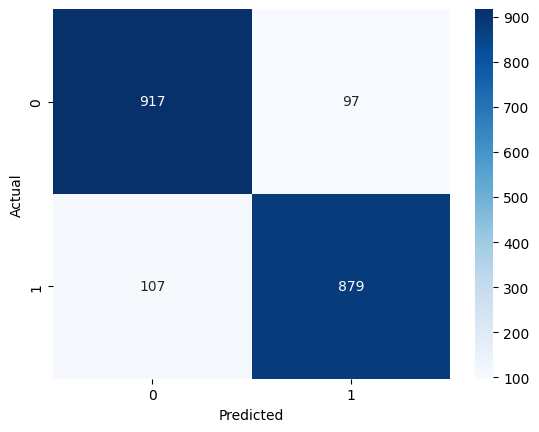

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
probabilities = model.predict_proba(X_test)[:, 1]  # Get probability of click (class 1)
print(probabilities[:10])  # Show first 10 probabilities


[0.16 0.15 0.99 0.2  0.02 0.68 0.87 1.   0.04 0.97]


In [ ]:
import joblib
joblib.dump(model, "ctr_model.pkl")  # Save model


['ctr_model.pkl']

In [ ]:
import pandas as pd

# Example values (use actual values)
new_data_dict = {
    "Daily Time Spent on Site": [60],
    "Age": [30],
    "Area Income": [50000],
    "Daily Internet Usage": [150],
    # Add all other categorical/one-hot encoded features with correct values
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data_dict)

# Ensure columns match (add missing columns if needed)
for col in X.columns:
    if col not in new_data_df.columns:
        new_data_df[col] = 0  # Add missing columns with default values

# Reorder to match training data
new_data_df = new_data_df[X.columns]

# Apply scaling (if used in training)
new_data_scaled = scaler.transform(new_data_df)


<ipython-input-21-646c4974bd4e>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_df[col] = 0  # Add missing columns with default values
<ipython-input-21-646c4974bd4e>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_df[col] = 0  # Add missing columns with default values
<ipython-input-21-646c4974bd4e>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [ ]:
new_data_scaled = scaler.transform(new_data_df)  # Apply scaling



In [ ]:
# Load trained model (if not already loaded)
import joblib
model = joblib.load("ctr_model.pkl")

# Make predictions
prediction = model.predict(new_data_scaled)  # 0 = No Click, 1 = Click
probability = model.predict_proba(new_data_scaled)[:, 1]  # Probability of Click

# Print results
print("Prediction (Clicked or Not):", prediction[0])
print("Click Probability:", probability[0])


Prediction (Clicked or Not): 0
Click Probability: 0.45


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_test contains actual labels and y_pred contains model predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.898
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1014
           1       0.90      0.89      0.90       986

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities of "click" (class 1)
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.96252915571452


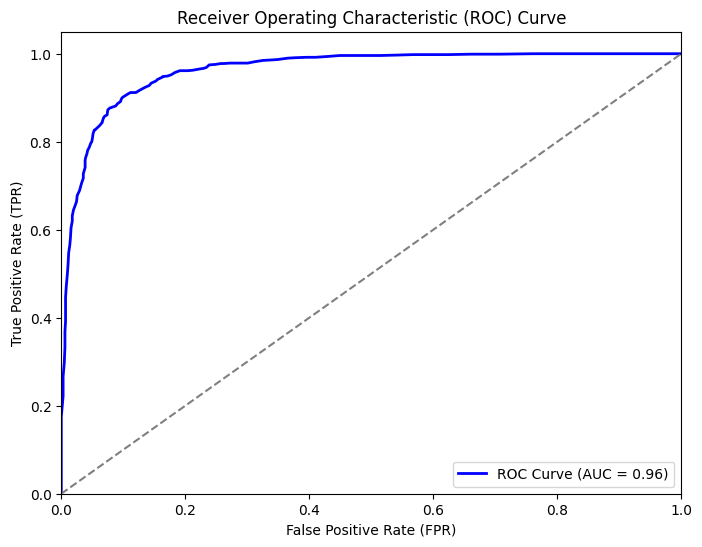

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities of class 1 (Click)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


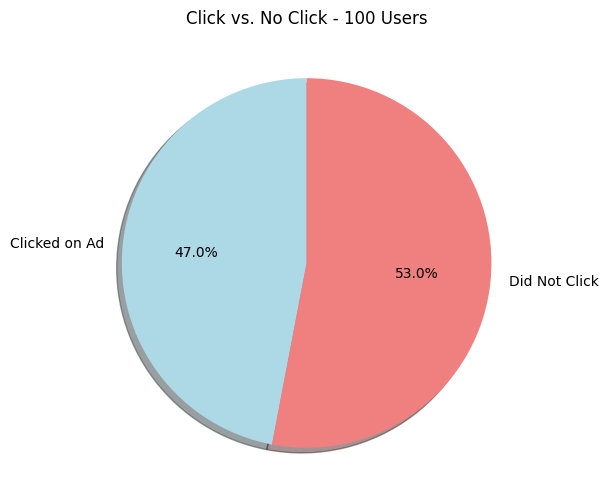

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating predicted probabilities for 100 users (Replace with your model's actual predictions)
np.random.seed(42)  # For reproducibility
click_probabilities = np.random.rand(100)  # Random probabilities between 0 and 1

# Classify based on threshold (0.5)
clicked = sum(click_probabilities >= 0.5)  # Users who clicked
not_clicked = sum(click_probabilities < 0.5)  # Users who didn't click

# Pie chart labels and data
labels = ['Clicked on Ad', 'Did Not Click']
sizes = [clicked, not_clicked]
colors = ['lightblue', 'lightcoral']

# Plotting Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Click vs. No Click - 100 Users")
plt.show()
